In [1]:
# para
target_year = 2024

In [2]:
# 読み込みファイルパスの設定とimportしたいmoduleパス(pythonパス)の設定
from pathlib import Path
import os, sys

CURRENT_DIR = Path(os.getcwd())
PJ_DIR = CURRENT_DIR.parent.parent
LIB_DIR = PJ_DIR / "lib"
DATA_DIR = PJ_DIR / "data" 

sys.path.append(str(LIB_DIR))

# notebook内で利用するmoduleのimport
from lib_dataprocess import CreditbalancePl, PricelistPl, read_data, PricelistFig
import polars as pl
from datetime import date
from dateutil.relativedelta import relativedelta

In [3]:
##### reviced_pricelistの加工

In [4]:
fp = DATA_DIR/"reviced_pricelist.parquet"
df = read_data(fp)
RPL = PricelistPl(df)

RPL.with_columns_moving_zscore()
RPL.with_columns_daily_updown_rate()
RPL.df = RPL.df.filter(pl.col("date")>=date(target_year, 1, 1)).filter(pl.col("date")<=date(target_year, 12, 31))
RPL.with_columns_weekid()
RPL.df

code,date,open,high,low,close,volume,accumulated_split_rate,zs25,daily_updown_rate,weekid
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,i16
1301,2024-01-04,3775.0,3825.0,3755.0,3815.0,21400.0,1.0,0.87,1.06,0
1301,2024-01-05,3830.0,3870.0,3815.0,3850.0,16800.0,1.0,0.18,0.52,0
1301,2024-01-09,3890.0,3900.0,3865.0,3885.0,24500.0,1.0,1.2,-0.13,1
1301,2024-01-10,3895.0,3940.0,3895.0,3910.0,26400.0,1.0,1.34,0.39,1
1301,2024-01-11,3935.0,3945.0,3890.0,3890.0,24000.0,1.0,0.95,-1.14,1
…,…,…,…,…,…,…,…,…,…,…
9997,2024-12-16,785.0,789.0,781.0,786.0,103100.0,1.0,-0.53,0.13,50
9997,2024-12-17,787.0,789.0,782.0,786.0,99400.0,1.0,-0.56,-0.13,50
9997,2024-12-18,786.0,787.0,774.0,776.0,119100.0,1.0,-0.21,-1.27,50


In [5]:
##### creditbalanceの加工

In [6]:
CPL = CreditbalancePl()
CPL.with_columns_margin_volume_ratio()
delta = relativedelta(days=7)
start_date = RPL.df["date"].min() - delta
end_date = RPL.df["date"].max() - delta
CPL.df = CPL.df.filter(pl.col("date")>=start_date).filter(pl.col("date")<=end_date)
CPL.with_columns_weekid()
CPL.df

code,date,unsold_margin,purchase_margin,volume_ma25,unsold_margin_volume_ratio,purchase_margin_volume_ratio,weekid
i64,date,i64,i64,f64,f64,f64,i16
1301,2023-12-29,2000,29200,15180.0,0.13,1.92,0
1301,2024-01-12,4900,31300,17056.0,0.29,1.84,2
1301,2024-01-19,4300,31800,16276.0,0.26,1.95,3
1301,2024-01-26,5200,32200,16264.0,0.32,1.98,4
1301,2024-02-02,7600,22800,18404.0,0.41,1.24,5
…,…,…,…,…,…,…,…
9997,2024-11-15,39300,637200,168780.0,0.23,3.78,46
9997,2024-11-22,39700,634500,148708.0,0.27,4.27,47
9997,2024-11-29,40200,667800,142640.0,0.28,4.68,48


In [7]:
####### revoced_pricelistにcreditbalanceをjoin
joined_df = RPL.df.join(CPL.df, on=["code", "weekid"], how="left")

In [8]:
joined_df

code,date,open,high,low,close,volume,accumulated_split_rate,zs25,daily_updown_rate,weekid,date_right,unsold_margin,purchase_margin,volume_ma25,unsold_margin_volume_ratio,purchase_margin_volume_ratio
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,i16,date,i64,i64,f64,f64,f64
1301,2024-01-04,3775.0,3825.0,3755.0,3815.0,21400.0,1.0,0.87,1.06,0,2023-12-29,2000,29200,15180.0,0.13,1.92
1301,2024-01-05,3830.0,3870.0,3815.0,3850.0,16800.0,1.0,0.18,0.52,0,2023-12-29,2000,29200,15180.0,0.13,1.92
1301,2024-01-09,3890.0,3900.0,3865.0,3885.0,24500.0,1.0,1.2,-0.13,1,null,null,null,null,null,null
1301,2024-01-10,3895.0,3940.0,3895.0,3910.0,26400.0,1.0,1.34,0.39,1,null,null,null,null,null,null
1301,2024-01-11,3935.0,3945.0,3890.0,3890.0,24000.0,1.0,0.95,-1.14,1,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9997,2024-12-16,785.0,789.0,781.0,786.0,103100.0,1.0,-0.53,0.13,50,2024-12-13,12800,669800,139584.0,0.09,4.8
9997,2024-12-17,787.0,789.0,782.0,786.0,99400.0,1.0,-0.56,-0.13,50,2024-12-13,12800,669800,139584.0,0.09,4.8
9997,2024-12-18,786.0,787.0,774.0,776.0,119100.0,1.0,-0.21,-1.27,50,2024-12-13,12800,669800,139584.0,0.09,4.8


In [9]:
##### いろいろfilterしてみる

In [15]:
min_zs25 = 3
min_daily_updown_rate = 5
min_unsold_margin_volume_ratio = 2
display_cols = [
    "code",
    "date",
    "zs25",
    "daily_updown_rate",
    "unsold_margin_volume_ratio"
]

In [113]:
#df = joined_df.filter(pl.col("zs25")>=min_zs25)\
#    .filter(pl.col("daily_updown_rate")>=min_daily_updown_rate)\
#    .filter(pl.col("unsold_margin_volume_ratio")>=min_unsold_margin_volume_ratio)
df = joined_df.filter(pl.col("zs25")>=min_zs25)\
    .filter(pl.col("unsold_margin_volume_ratio")>=min_unsold_margin_volume_ratio)

df = df.drop_nulls()
df = df.select(display_cols)
df[50:55]

code,date,zs25,daily_updown_rate,unsold_margin_volume_ratio
i64,date,f64,f64,f64
1899,2024-12-16,3.09,0.39,10.03
1904,2024-09-26,4.33,0.47,2.26
1946,2024-07-16,3.89,-2.37,6.46
2009,2024-12-16,3.82,21.86,2.03
2009,2024-12-17,4.63,-3.25,2.03


In [114]:
##### chart

In [115]:
code = 1899
dt = date(2024, 12, 16)
weeks = 4

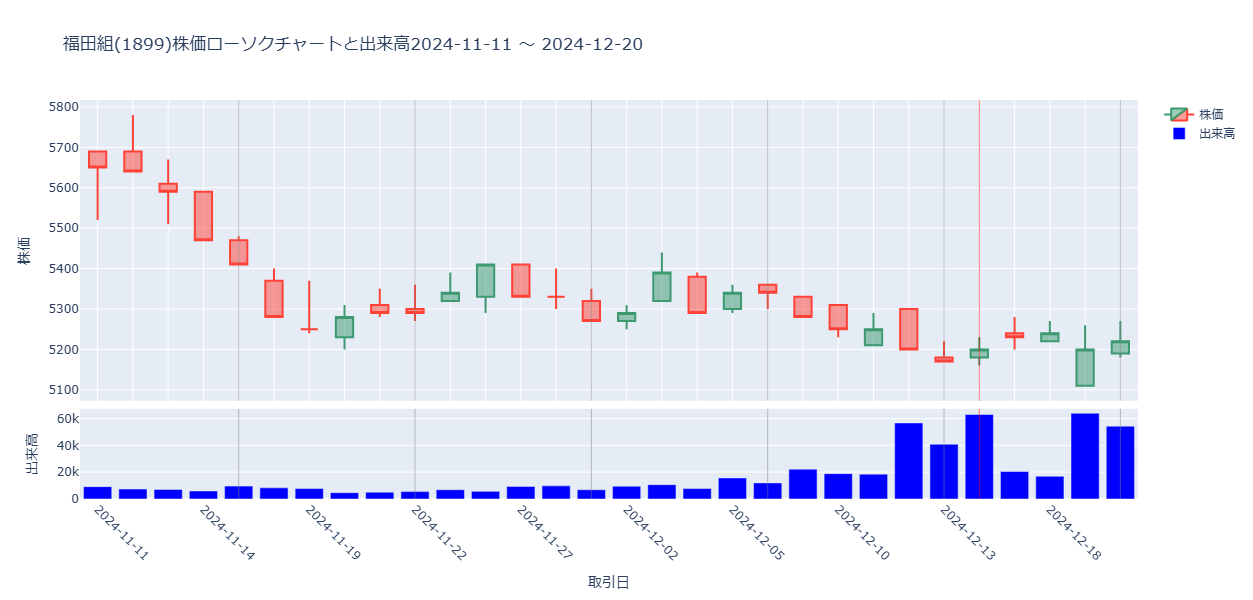

In [116]:
# 日足チャート
start_date = dt - relativedelta(days = 7 * (weeks + 1))
end_date = dt + relativedelta(days = 7 * weeks)
PFIG = PricelistFig(code, start_date=start_date, end_date=end_date)

# 週末にvline
df = read_data(fp)
RPL = PricelistPl(df)
df = RPL.df
df = df.filter(pl.col("code")==code)\
.filter(pl.col("date")>=start_date)\
.filter(pl.col("date")<=end_date)
RPL = PricelistPl(df)
RPL.with_columns_weekid()
pdf = RPL.df
pdf = pdf.group_by(["weekid"]).agg([
    pl.col("date").last()
]).sort(by=["weekid"])
vline_dates = pdf["date"].to_list()
#vline_dates.remove(dt)
for d in vline_dates:
    PFIG.add_vline(d)

# 該当日にvline
PFIG.add_vline(dt, color="red")

PFIG.fig.show()